# Student Performance Indicator

# 🧠 Machine Learning Project Life Cycle

- **Understanding the Problem Statement**
- **Data Collection**
- **Data Checks to Perform**
- **Exploratory Data Analysis (EDA)**
- **Data Preprocessing**
- **Model Training**
- **Choosing the Best Model**

---

## 1. Problem Statement

The goal of this project is to analyze how students' academic performance (test scores) is influenced by factors such as:

- Gender  
- Ethnicity  
- Parental level of education  
- Lunch type  
- Test preparation course  

The objective is to build a model that can predict student performance based on these variables.

---

## 2. Data Collection

- **Dataset Source:** Kaggle  
- **Dataset Size:** 1,000 rows and 8 columns  

The dataset contains student demographic features and their test scores.





Import the CSV Data as Pandas DataFrame

In [100]:


### 2.1 Import Required Libraries and Load Dataset
# importing library
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [101]:
# Load dataset
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [102]:
df.shape


(1000, 8)

### 2.2 Dataset Information

- **gender:** Sex of the student (male/female)  
- **race/ethnicity:** Ethnicity group of the student (Group A, B, C, D, E)  
- **parental level of education:** Highest education level of the parents  
  (bachelor's degree, some college, master's degree, associate's degree, high school)  
- **lunch:** Type of lunch before the test (standard or free/reduced)  
- **test preparation course:** Whether the student completed the preparation course (completed / not completed)  
- **math score:** Student's mathematics score  
- **reading score:** Student's reading score  
- **writing score:** Student's writing score  


### 3. Data Checks to Perform

- **Check for missing values**
- **Check for duplicate records**
- **Check data types of each column**
- **Check the number of unique values in each column**
- **Check statistical summary of the dataset**
- **Check the different categories present in each categorical column**


In [103]:
# checking or missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in each columns


In [104]:
# checking for duplicate values
df.duplicated().sum()

np.int64(0)

There are no duplicates in each columns

In [105]:
# checking the data types of each column
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [106]:
# checking the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [107]:
# checking the number of unique values in each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [108]:
# check the statistics of the dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [109]:
# Exploring the Data

print("Categories in 'gender' variable:   ", end =" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:   ", end =" ")
print(df['race/ethnicity'].unique())

print("Categories in 'Parental Level Of Education' variable:   ", end =" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:   ", end =" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:   ", end =" ")
print(df['test preparation course'].unique())


Categories in 'gender' variable:    ['female' 'male']
Categories in 'race/ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'Parental Level Of Education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test preparation course' variable:    ['none' 'completed']


In [110]:
# define numerical and categorical feature
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print("we have {} numerical features : {}".format(len(numerical_features), numerical_features))
print("we have {} categorical features : {}".format(len(categorical_features), categorical_features))

we have 3 numerical features : ['math score', 'reading score', 'writing score']
we have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [111]:
# adding columns of total score and average
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [112]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f"Number of student with full narks in Maths: {math_full}")
print(f"Number of student with full narks in writing: {writing_full}")
print(f"Number of student with full narks in reading: {reading_full}")

Number of student with full narks in Maths: 7
Number of student with full narks in writing: 14
Number of student with full narks in reading: 17


In [113]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f"Number of student with less than 20 marks in Maths: {math_less_20}")
print(f"Number of student with less than 20 marks in writing: {writing_less_20}")
print(f"Number of student with less than 20 marks reading: {reading_less_20}")

Number of student with less than 20 marks in Maths: 4
Number of student with less than 20 marks in writing: 3
Number of student with less than 20 marks reading: 1


## Exploring data and visualization


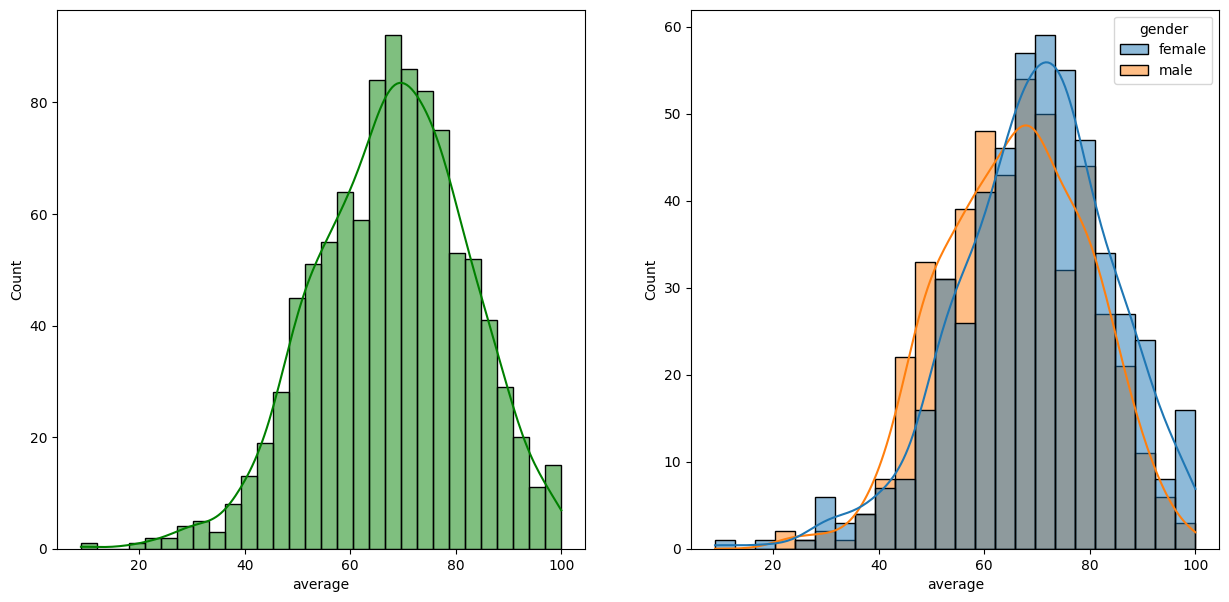

In [115]:
# visualizing using histogram
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x="average", bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x="average", kde=True, hue="gender")
plt.show()

female student tends to perform better than male student from the visualization above


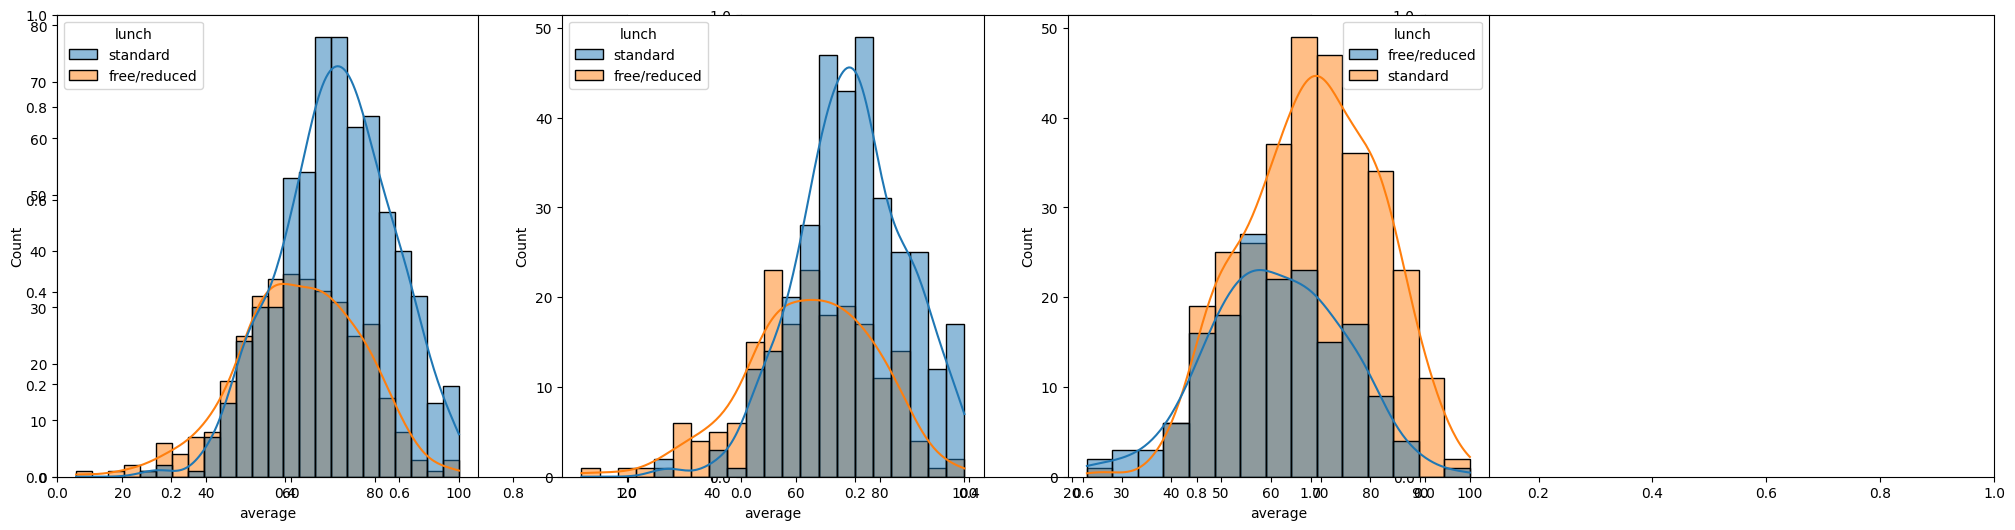

In [117]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x="average", kde=True, hue="lunch")
plt.subplot(142)
sns.histplot(data=df[df.gender=="female"], x="average", kde=True, hue="lunch")
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"], x="average", kde=True, hue="lunch")
plt.show()

# insight
- standard lunch helps perform well in exams.
- standard lunch helps perform well in exams be it male or female

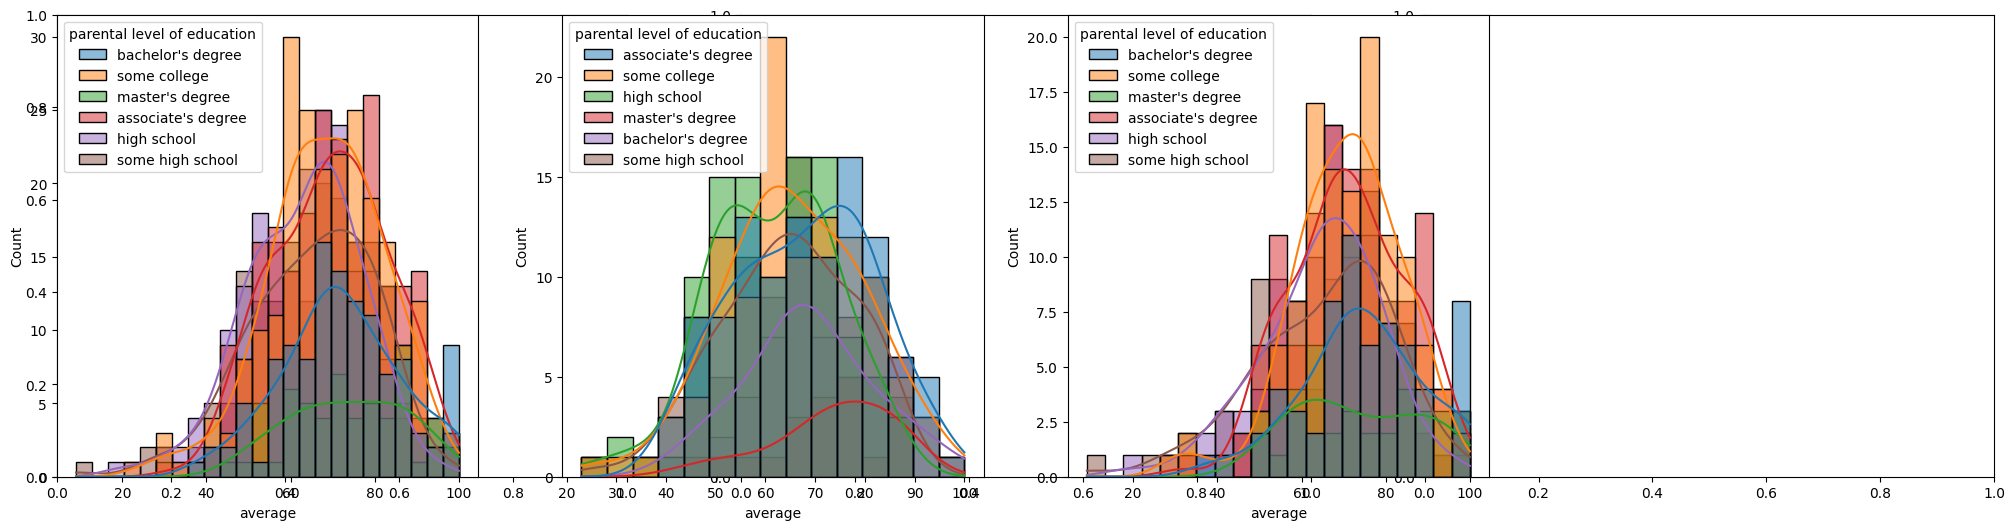

In [119]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue="parental level of education")
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue="parental level of education")
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == "female"], x="average", kde=True, hue="parental level of education")
plt.show()

insights
in general parent's education doesnt help student perform well in exam


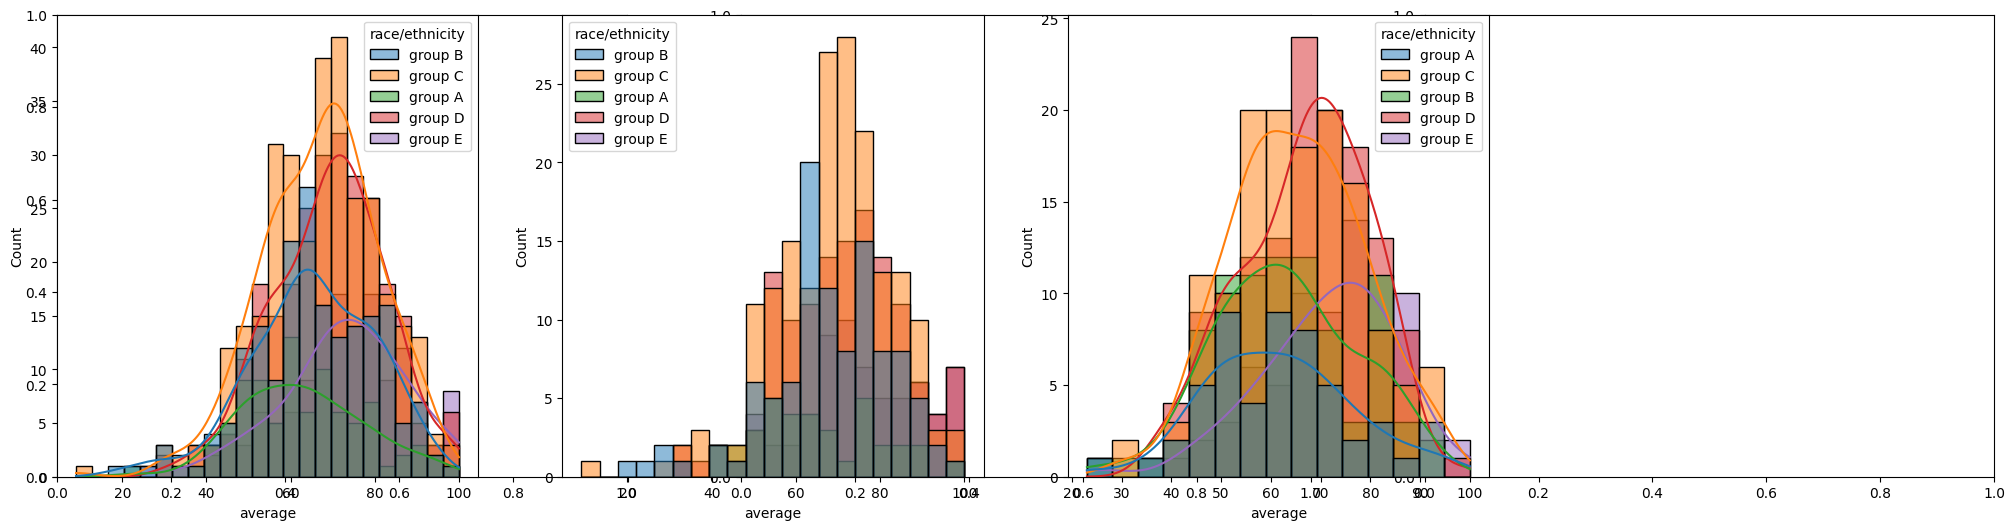

In [120]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue="race/ethnicity")
plt.subplot(142)
ax= sns.histplot(data=df[df.gender=="female"], x='average', hue='race/ethnicity')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender=="male"], x="average", kde=True, hue='race/ethnicity')
plt.show()


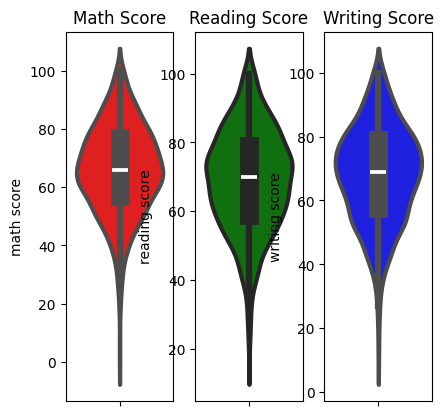

In [121]:
# maximum score of student in all three subject
plt.Figure(figsize=(18, 8))
plt.subplot(1, 4, 1)
plt.title("Math Score")
sns.violinplot(y="math score", data=df, color="red", linewidth=3)
plt.subplot(1, 4, 2)
plt.title("Reading Score")
sns.violinplot(y='reading score', data=df, color="green", linewidth=3)
plt.subplot(1, 4, 3)
plt.title("Writing Score")
sns.violinplot(y="writing score", data=df, color="blue", linewidth=3)
plt.show()